In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import kernel
from sklearn.metrics import mean_squared_error

# Kernel Ridge Regression

In [2]:
df = pd.read_csv("./ridgetrain.txt", delim_whitespace=True, header=None)
df_test = pd.read_csv("./ridgetest.txt", delim_whitespace=True, header=None)
n = len(df)
nt = len(df_test)

In [3]:
X = df[0]
y = df[1]
Xt = df_test[0]
yt = df_test[1]

In [4]:
def kernelized_vector(x:np.ndarray):
    global n
    global X
    Kvec = np.zeros((n))
    for i in range(n):
        Kvec[i] = kernel(X[i], x)
    return Kvec

def kernelized_matrix():
    global n
    global X
    K = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            K[i][j] = kernel(X[i], X[j])
    return K

In [5]:
def model(K:np.ndarray, x:np.ndarray, Lambda):
    """Generates predictions

    Args:
        K (np.ndarray): Kernel matrix on training inputs
        x (np.ndarray): test input
        Lambda (_type_): Regularizar hyperparameter

    Returns:
        y: test prediction
    """
    global n
    global y
    mid_mat = np.linalg.inv(K + Lambda * np.eye(n))
    Kvec = kernelized_vector(x)
    return np.dot(y, mid_mat @ Kvec)

In [8]:
K = kernelized_matrix()

In [13]:
def plot(Lambda):
    ypredt = np.zeros(nt)
    for i in range(nt):
        ypredt[i] = model(K, Xt[i], Lambda)
    plt.scatter(Xt, ypredt, c="red", s=1)
    plt.scatter(Xt, yt, c="blue", s=1)
    plt.show()
    mse = mean_squared_error(yt, ypredt)
    rmse = np.sqrt(mse)
    print(f"Lambda: {Lambda}\tRMSE: {rmse:.3f}")

In [14]:
Lambdas = [0.1, 1, 10, 100]    

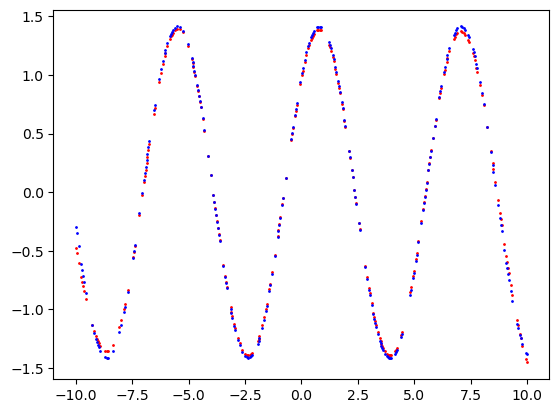

Lambda: 0.1	RMSE: 0.033


In [15]:
plot(Lambdas[0])

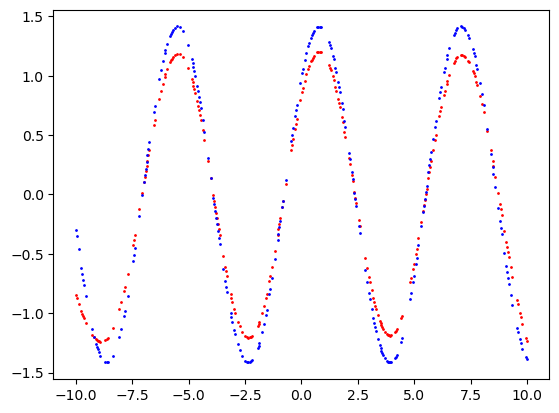

Lambda: 1	RMSE: 0.170


In [16]:
plot(Lambdas[1])

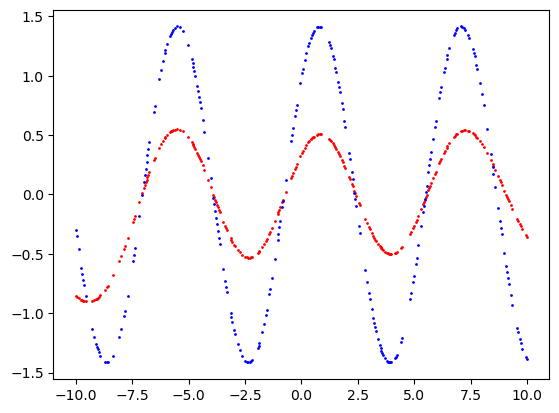

Lambda: 10	RMSE: 0.609


In [17]:
plot(Lambdas[2])

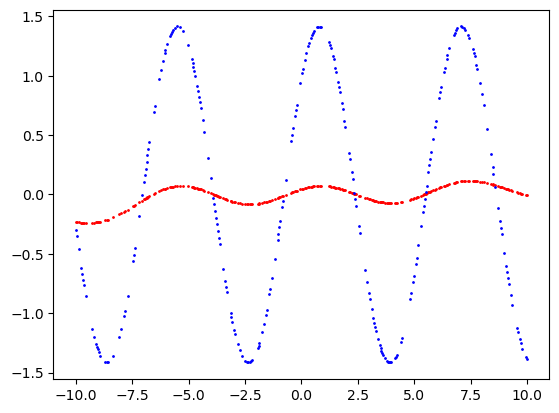

Lambda: 100	RMSE: 0.911


In [18]:
plot(Lambdas[3])

# Landmark Ridge Regression

In [19]:
df = pd.read_csv("./ridgetrain.txt", delim_whitespace=True, header=None)
df_test = pd.read_csv("./ridgetest.txt", delim_whitespace=True, header=None)
n = len(df)
nt = len(df_test)

In [20]:
X = df[0]
y = df[1]
Xt = df_test[0]
yt = df_test[1]

In [21]:
class Landmark_Ridge():

    def __init__(self, L) -> None:
        global X
        self.L = L
        self.XL = np.random.choice(X, L)
        self.Xtilde = self.calculate_Xtilde()
        self.K = self.calculate_XtransposeX(self.Xtilde)
        self.w = self.model()

    def kernelized_vector(self, x:np.ndarray):
        Kvec = np.zeros((self.L))
        for i in range(self.L):
            Kvec[i] = kernel(self.XL[i], x)
        return Kvec

    def calculate_Xtilde(self):
        global n
        global X
        Xtilde = np.zeros((n, self.L))
        for i in range(n):
            Xtilde[i] = self.kernelized_vector(X[i])
        return Xtilde

    def calculate_XtransposeX(self, Xtilde):
        global n
        K = Xtilde.T @ Xtilde
        return K

    def model(self, Lambda=0.1):
        """Generates predictions

        Args:
            K (np.ndarray): X^T X
            x (np.ndarray): test input
            Lambda (_type_): Regularizar hyperparameter

        Returns:
            y: test prediction
        """
        global n
        global y
        mid_mat = np.linalg.inv(self.K + Lambda * np.eye(self.L))
        return mid_mat @ self.Xtilde.T @ y

    def predict(self, x:np.ndarray):
        xtilde = self.kernelized_vector(x)
        return np.dot(self.w, xtilde)

In [22]:
Ls = [2, 5, 20, 50, 100]

In [23]:
def plot(L):
    lr = Landmark_Ridge(L)
    ypred = np.zeros(nt)
    for i in range(nt):
        ypred[i] = lr.predict(Xt[i])
    plt.figure(figsize=(12, 7))
    plt.scatter(Xt, ypred, c="red", s=1)
    plt.scatter(Xt, yt, c="blue", s=1)
    plt.show()
    mse = mean_squared_error(yt, ypred)
    rmse = np.sqrt(mse)
    print(f"L: {L}\tRMSE: {rmse:.3f}")

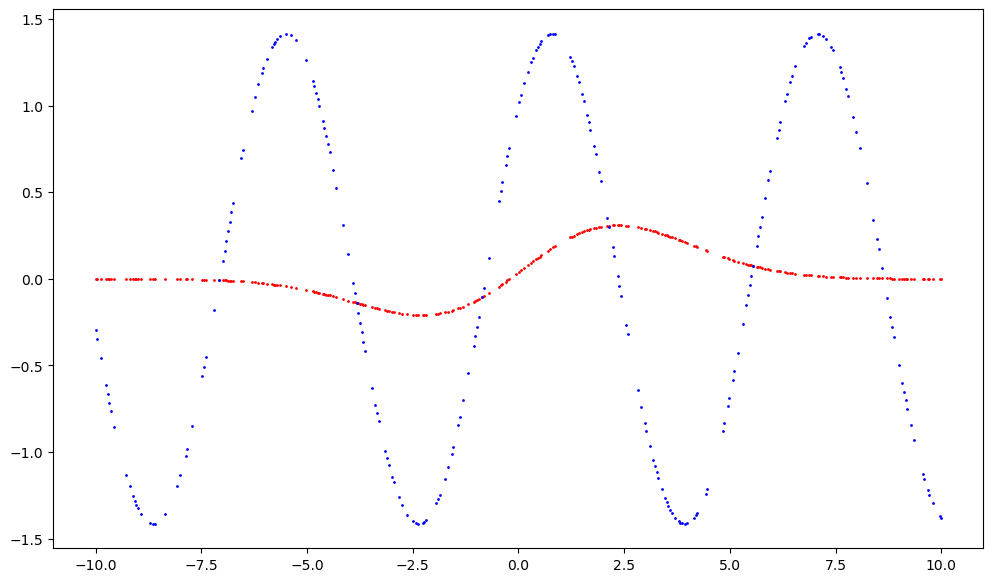

L: 2	RMSE: 0.972


In [24]:
plot(Ls[0])

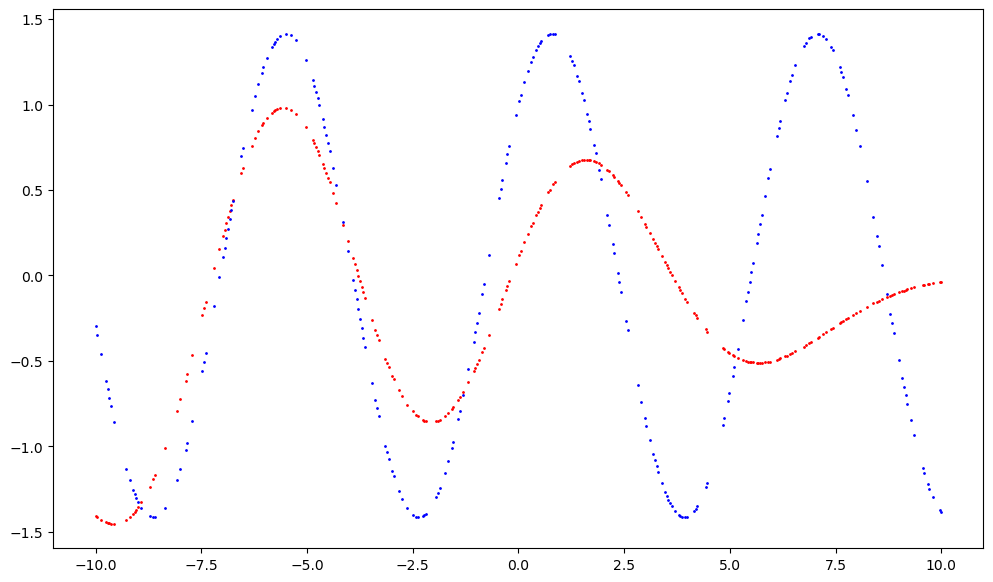

L: 5	RMSE: 0.804


In [25]:
plot(Ls[1])

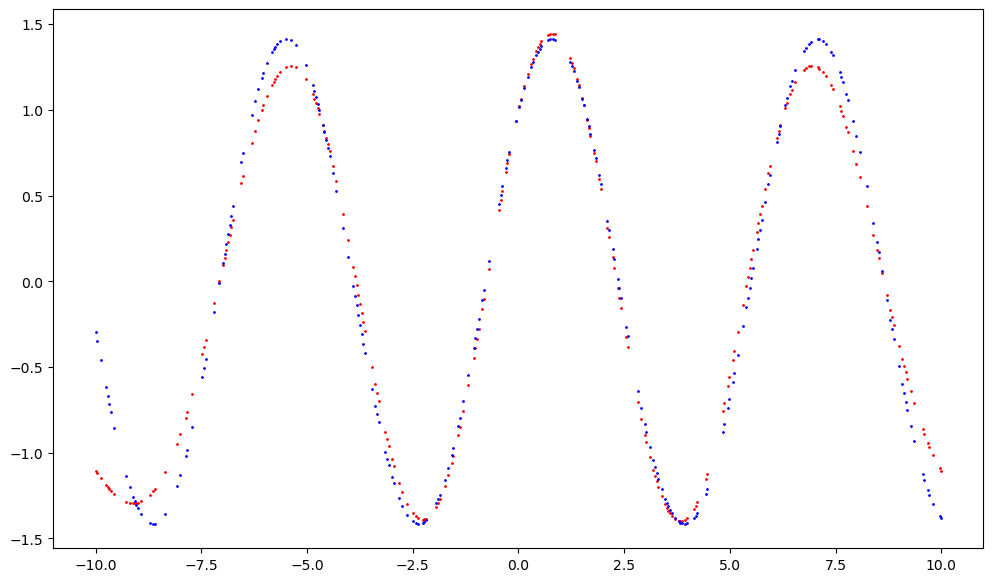

L: 20	RMSE: 0.154


In [26]:
plot(Ls[2])

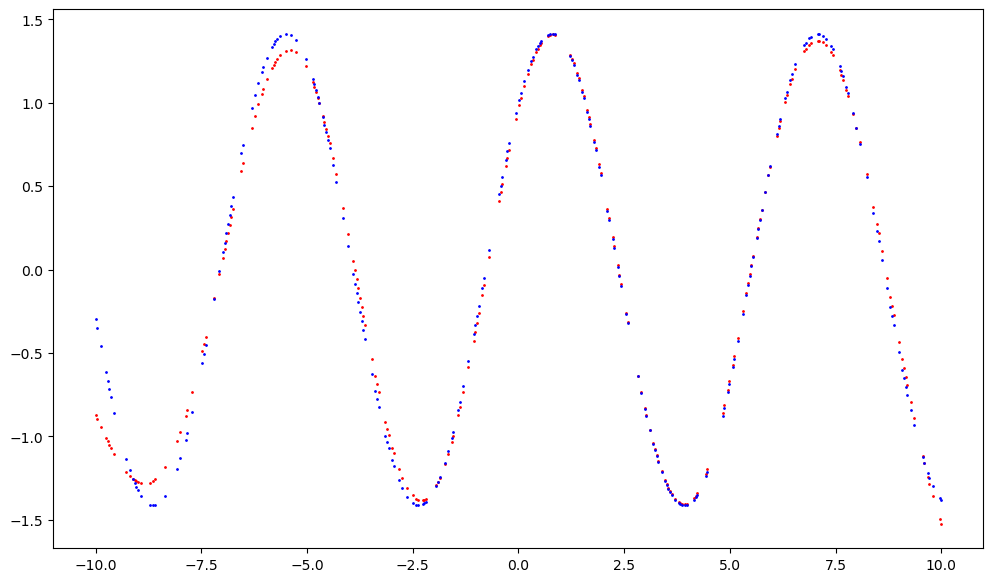

L: 50	RMSE: 0.094


In [27]:
plot(Ls[3])

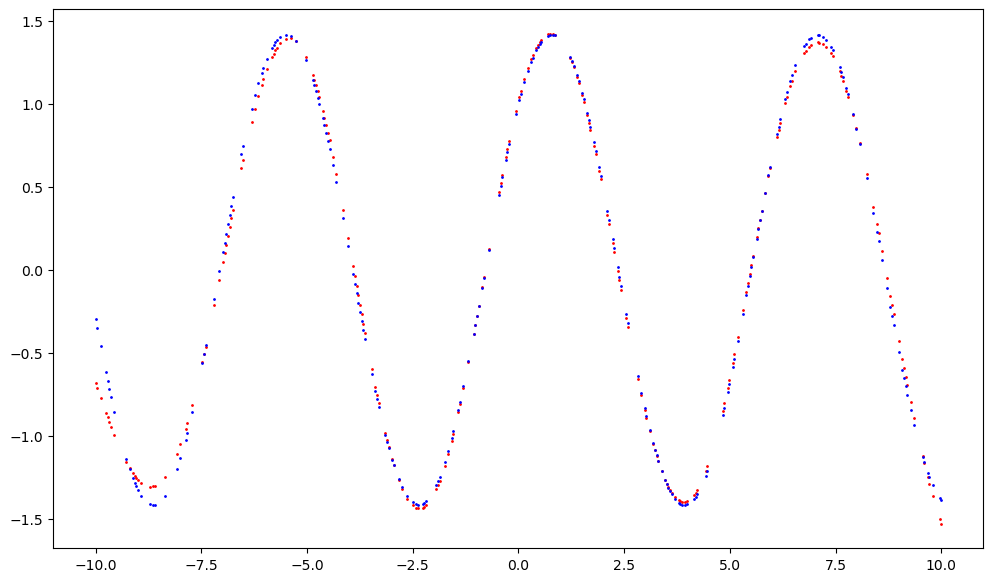

L: 100	RMSE: 0.062


In [28]:
plot(Ls[4])